# Import Required Libraris:
1. also import make circel dataset 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

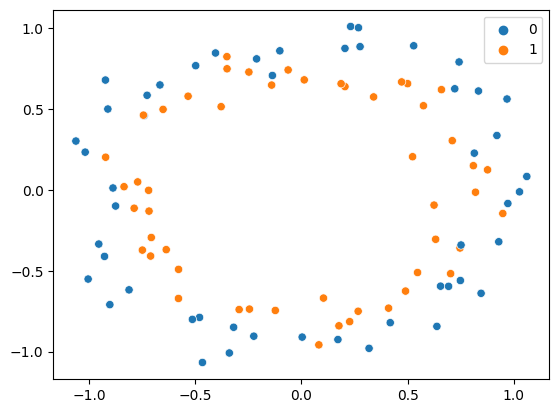

In [3]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

# Train Test Split:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 2)

In [12]:
model = Sequential()

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'],)

In [15]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs= 3500,verbose = 0)

# Loss vs Validation Loss

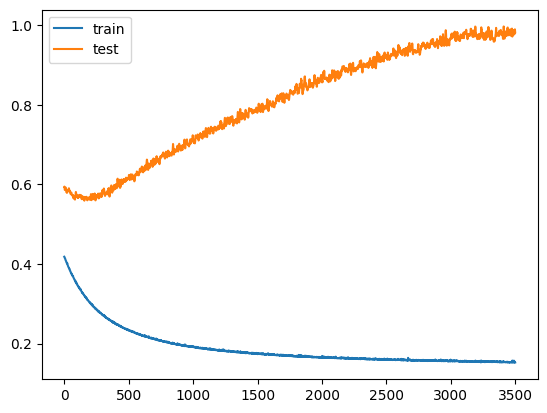

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 923us/step


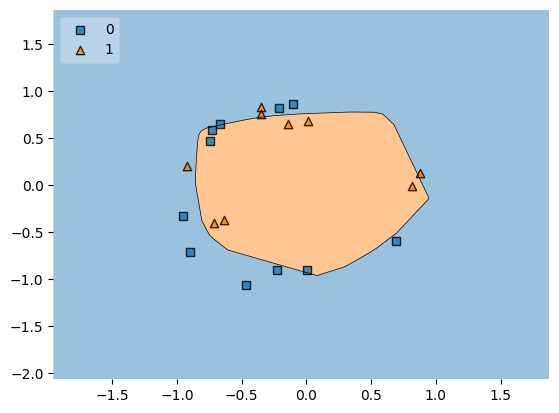

In [17]:
plot_decision_regions(X_test,y_test.ravel(),clf = model,legend=2)
plt.show()

# Early Stopping:
1. Early stopping is machenism that automatically detect that loss function and check that from which point loss function increasing.
2. model facing overfiting problem so we need to use early stopping.

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callback:

In [7]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5500 - loss: 0.6899 - val_accuracy: 0.3000 - val_loss: 0.7127
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5086 - loss: 0.6893 - val_accuracy: 0.3500 - val_loss: 0.7124
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5320 - loss: 0.6883 - val_accuracy: 0.4000 - val_loss: 0.7132
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5500 - loss: 0.6864 - val_accuracy: 0.4500 - val_loss: 0.7130
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5109 - loss: 0.6885 - val_accuracy: 0.4500 - val_loss: 0.7129
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5328 - loss: 0.6859 - val_accuracy: 0.4000 - val_loss: 0.7139
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5664 - loss: 0.6861 - val_accuracy: 0.4000 - val_loss: 0.7153
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5703 - loss: 0.6859 - val_accuracy: 0.4000 - 

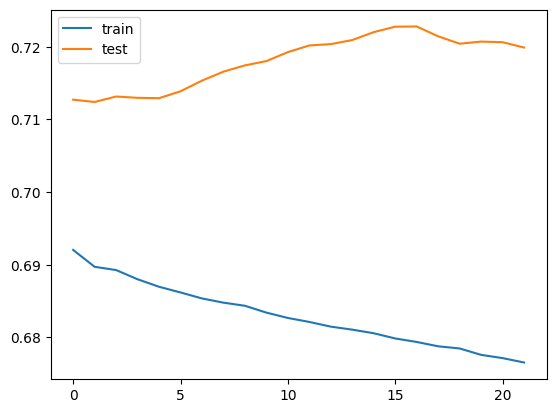

In [9]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label= 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


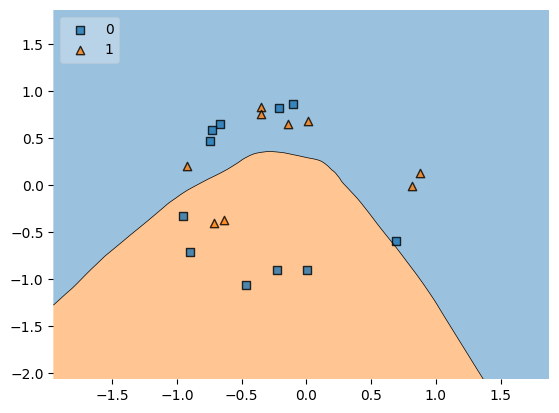

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()